In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import os

# Brazil

In [78]:
lats = []
longs = []
types = []

In [79]:
brazil_admin = gpd.read_file('../data/reference/brazil.geojson')

for month in range(1, 13):
    for day in range(1, 29):
        file = "../data/brazil/raw/2019/2019{}{}.csv".format(str(month).zfill(2),
                                                             str(day).zfill(2))
        if os.path.exists(file):
            brazil_gdelt = pd.read_csv(file)
            brazil_gdelt = brazil_gdelt[brazil_gdelt['ActionGeo_Lat'].notna()]
            lats.append(list(brazil_gdelt['ActionGeo_Lat']))
            longs.append(list(brazil_gdelt['ActionGeo_Long']))
            types.append(list(brazil_gdelt['QuadClass']))
    
lats = [item for sublist in lats for item in sublist]
longs = [item for sublist in longs for item in sublist]
types = [item for sublist in types for item in sublist]

coords = pd.DataFrame({'Latitude': np.array(lats).flatten(), 
                       'Longitude': np.array(longs).flatten(),
                       'Type': np.array(types).flatten()})
coords = gpd.GeoDataFrame(
    coords, geometry=gpd.points_from_xy(coords.Longitude, coords.Latitude))

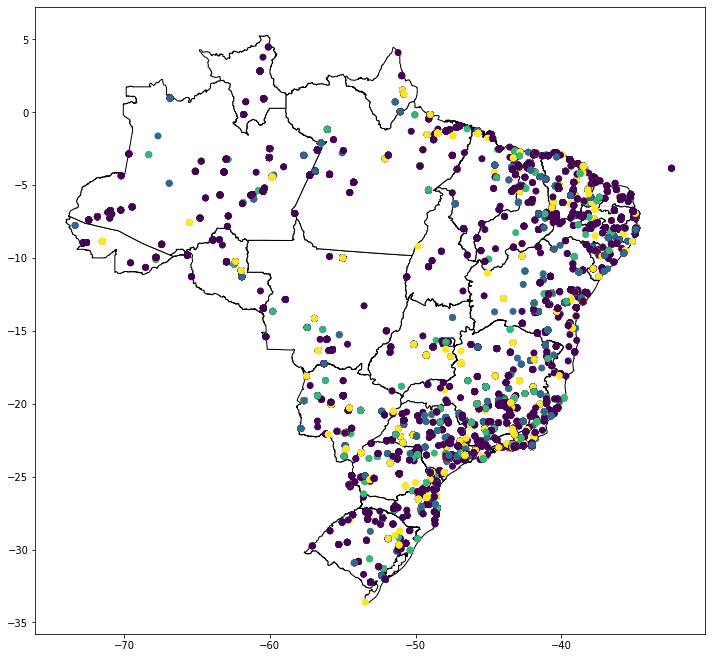

In [80]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = brazil_admin.plot(color='white', edgecolor='black', ax = ax)
coords.plot(ax=ax, column = 'Type')

# Indonesia

In [99]:
lats = []
longs = []
types = []

In [100]:
ind_admin = gpd.read_file('../data/reference/indonesia.geojson')

for month in range(1, 13):
    for day in range(1, 29):
        file = "../data/indonesia/raw/2019/2019{}{}.csv".format(str(month).zfill(2),
                                                             str(day).zfill(2))
        if os.path.exists(file):
            ind_gdelt = pd.read_csv(file)
            ind_gdelt = ind_gdelt[ind_gdelt['ActionGeo_Lat'].notna()]
            lats.append(list(ind_gdelt['ActionGeo_Lat']))
            longs.append(list(ind_gdelt['ActionGeo_Long']))
            types.append(list(ind_gdelt['QuadClass']))
    
lats = [item for sublist in lats for item in sublist]
longs = [item for sublist in longs for item in sublist]
types = [item for sublist in types for item in sublist]

coords = pd.DataFrame({'Latitude': np.array(lats).flatten(), 
                       'Longitude': np.array(longs).flatten(),
                       'Type': np.array(types).flatten()})
coords = gpd.GeoDataFrame(
    coords, geometry=gpd.points_from_xy(coords.Longitude, coords.Latitude))

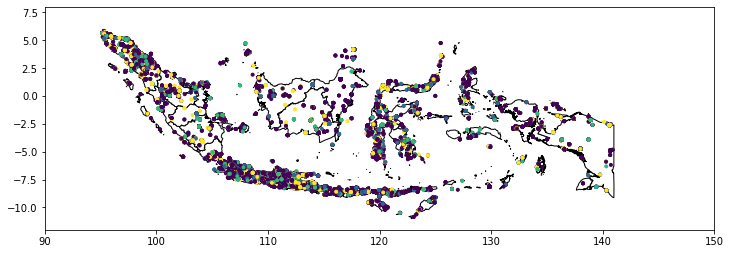

In [101]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = ind_admin.plot(color='white', edgecolor='black', ax = ax)
ax.set_xlim(90, 150)
ax.set_ylim(-12, 8)
coords.plot(ax=ax, column = 'Type', markersize = 9)

# Mexico

In [105]:
lats = []
longs = []
types = []

In [106]:
mex_admin = gpd.read_file('../data/reference/mexico.geojson')

for month in range(1, 5):
    for day in range(1, 29):
        file = "../data/mexico/raw/2019/2019{}{}.csv".format(str(month).zfill(2),
                                                             str(day).zfill(2))
        if os.path.exists(file):
            mex_gdelt = pd.read_csv(file)
            mex_gdelt = mex_gdelt[mex_gdelt['ActionGeo_Lat'].notna()]
            lats.append(list(mex_gdelt['ActionGeo_Lat']))
            longs.append(list(mex_gdelt['ActionGeo_Long']))
            types.append(list(mex_gdelt['QuadClass']))
    
lats = [item for sublist in lats for item in sublist]
longs = [item for sublist in longs for item in sublist]
types = [item for sublist in types for item in sublist]

coords = pd.DataFrame({'Latitude': np.array(lats).flatten(), 
                       'Longitude': np.array(longs).flatten(),
                       'Type': np.array(types).flatten()})
coords = gpd.GeoDataFrame(
    coords, geometry=gpd.points_from_xy(coords.Longitude, coords.Latitude))

/Users/john.brandt/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


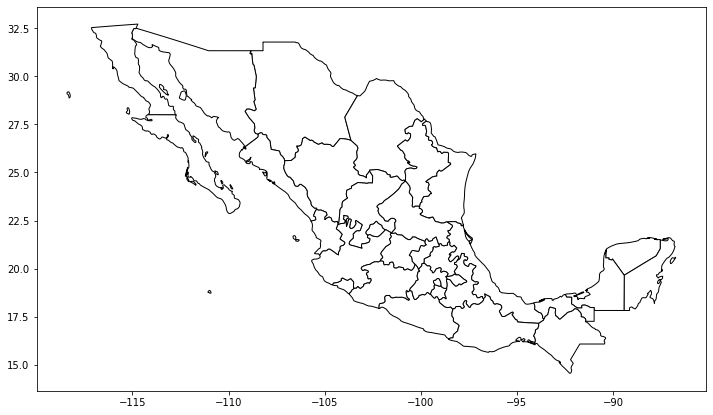

In [107]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = mex_admin.plot(color='white', edgecolor='black', ax = ax)
coords.plot(ax=ax, column = 'Type', markersize = 9)